In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import glob
from lxml import etree
from matplotlib.patches import Rectangle#画矩形框的方法
import os

In [2]:
gpu = tf.config.experimental.list_physical_devices(device_type='GPU')
tf.config.experimental.set_memory_growth(gpu[0],True)

In [3]:
print(os.listdir('../input/the-oxfordiiit-pet-dataset/images/images')[:3])

['scottish_terrier_57.jpg', 'Abyssinian_79.jpg', 'pug_4.jpg']


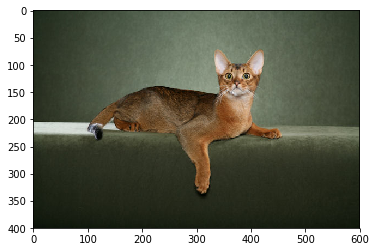

In [4]:
image = tf.io.read_file('../input/the-oxfordiiit-pet-dataset/images/images/Abyssinian_1.jpg')
image = tf.image.decode_jpeg(image)
plt.imshow(image)

In [5]:
xml = open('../input/the-oxfordiiit-pet-dataset/annotations/annotations/xmls/Abyssinian_1.xml').read()
sel = etree.HTML(xml)

In [6]:
int(sel.xpath('//name/text()')[0] == 'cat')  #cat=1.dog=0

1

In [7]:
label = int(sel.xpath('//name/text()')[0] == 'cat')
width = int(sel.xpath('//width/text()')[0])
height = int(sel.xpath('//height/text()')[0])
xmin = int(sel.xpath('//xmin/text()')[0])
ymin = int(sel.xpath('//ymin/text()')[0])
xmax = int(sel.xpath('//xmax/text()')[0])
ymax = int(sel.xpath('//ymax/text()')[0])

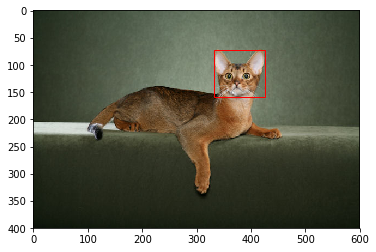

In [8]:
plt.imshow(image)
rect = Rectangle((xmin,ymin),(xmax-xmin),(ymax-ymin),fill=False,color='red')
ax = plt.gca()
ax.axes.add_patch(rect)

In [9]:
b1 = xmin/width
b2 = xmax/width
b3 = ymin/height
b4 = ymax/height

In [10]:
b1,b2,b3,b4

(0.555, 0.7083333333333334, 0.18, 0.395)

In [11]:
image.shape

TensorShape([400, 600, 3])

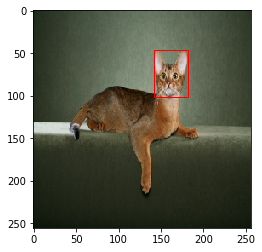

In [12]:
image = tf.image.resize(image,(256,256))
image = image/255
xmin = b1*256
xmax = b2*256
ymin = b3*256
ymax = b4*256
plt.imshow(image)
rect = Rectangle((xmin,ymin),(xmax-xmin),(ymax-ymin),fill=False,color='red')
ax = plt.gca()
ax.axes.add_patch(rect)

In [13]:
print(image)

tf.Tensor(
[[[0.10588235 0.14901961 0.09411765]
  [0.10980392 0.15294118 0.09803922]
  [0.11020029 0.15333755 0.09843559]
  ...
  [0.16038795 0.2035252  0.1407801 ]
  [0.15796569 0.20110294 0.13835785]
  [0.15072955 0.1938668  0.13112171]]

 [[0.10257353 0.14571078 0.09080882]
  [0.10980392 0.15294118 0.09803922]
  [0.11452206 0.1576593  0.10275735]
  ...
  [0.16550244 0.20863971 0.1458946 ]
  [0.16409314 0.20723039 0.1444853 ]
  [0.15496324 0.19810049 0.1353554 ]]

 [[0.10303117 0.14616843 0.09126647]
  [0.1098652  0.15300246 0.09810049]
  [0.11821959 0.16135685 0.10645489]
  ...
  [0.1706093  0.21374655 0.15100145]
  [0.16862746 0.21176471 0.14901961]
  [0.16056794 0.20370519 0.1409601 ]]

 ...

 [[0.04313726 0.07058824 0.03921569]
  [0.04473039 0.07218137 0.04080882]
  [0.04705882 0.07450981 0.04313726]
  ...
  [0.06825981 0.09963235 0.04865196]
  [0.06276999 0.09414254 0.04316215]
  [0.0564951  0.08786765 0.03688725]]

 [[0.04333831 0.07078929 0.03941674]
  [0.03926739 0.06671837 0

In [14]:
image.shape

TensorShape([256, 256, 3])

数据预处理

In [15]:
images = glob.glob('../input/the-oxfordiiit-pet-dataset/images/images/*.jpg')
xmls = glob.glob('../input/the-oxfordiiit-pet-dataset/annotations/annotations/xmls/*.xml')

In [16]:
images[:3]

['../input/the-oxfordiiit-pet-dataset/images/images/scottish_terrier_57.jpg',
 '../input/the-oxfordiiit-pet-dataset/images/images/Abyssinian_79.jpg',
 '../input/the-oxfordiiit-pet-dataset/images/images/pug_4.jpg']

In [17]:
xmls[:3]

['../input/the-oxfordiiit-pet-dataset/annotations/annotations/xmls/american_bulldog_173.xml',
 '../input/the-oxfordiiit-pet-dataset/annotations/annotations/xmls/beagle_129.xml',
 '../input/the-oxfordiiit-pet-dataset/annotations/annotations/xmls/Siamese_109.xml']

In [18]:
names = [x.split('/')[-1].split('.')[0] for x in xmls]

In [19]:
names[:3]

['american_bulldog_173', 'beagle_129', 'Siamese_109']

In [20]:
train_images = [image for image in images if (image.split('/')[-1].split('.')[0]) in names]
test_images = [image for image in images if (image.split('/')[-1].split('.')[0]) not in names]

In [21]:
len(train_images),len(test_images)

(3686, 3704)

In [22]:
train_images.sort(key=lambda x:x.split('/')[-1].split('.')[0])
xmls.sort(key=lambda x:x.split('/')[-1].split('.')[0])

In [23]:
t=0
for i in range(3686):
    if train_images[i].split('/')[-1].split('.')[0] ==xmls[i].split('/')[-1].split('.')[0]:
        t+=1
print(t)

3686


In [24]:
def load_label(path):
    xml = open(path).read()
    sel = etree.HTML(xml)
    pet_label = int(sel.xpath('//name/text()')[0] == 'cat')
    width = int(sel.xpath('//width/text()')[0])
    height = int(sel.xpath('//height/text()')[0])
    xmin = int(sel.xpath('//xmin/text()')[0])
    ymin = int(sel.xpath('//ymin/text()')[0])
    xmax = int(sel.xpath('//xmax/text()')[0])
    ymax = int(sel.xpath('//ymax/text()')[0])
    return [pet_label,xmin/width,ymin/height,xmax/width,ymax/height]

In [25]:
labels = [load_label(path) for path in xmls]

In [26]:
pet_label,out1,out2,out3,out4 = list(zip(*labels))

In [27]:
pet_label = np.array(pet_label)
out1 = np.array(out1)
out2 = np.array(out2)
out3 = np.array(out3)
out4 = np.array(out4)
labels_ds = tf.data.Dataset.from_tensor_slices((pet_label,out1,out2,out3,out4))

In [28]:
labels_ds

<TensorSliceDataset shapes: ((), (), (), (), ()), types: (tf.int64, tf.float64, tf.float64, tf.float64, tf.float64)>

处理图片

In [29]:
def load_image(path):
    image = tf.io.read_file(path)
    image = tf.image.decode_jpeg(image,channels=3)
    image = tf.image.resize(image,[224,224])
    image = image/127.5-1 
    return image

In [30]:
image_ds = tf.data.Dataset.from_tensor_slices(train_images)

In [31]:
image_test_ds = tf.data.Dataset.from_tensor_slices(test_images)

In [32]:
image_ds = image_ds.map(load_image)

In [33]:
image_test_ds = image_test_ds.map(load_image)

In [34]:
image_ds

<MapDataset shapes: (224, 224, 3), types: tf.float32>

In [35]:
image_test_ds#测试集数据

<MapDataset shapes: (224, 224, 3), types: tf.float32>

In [36]:
dataset = tf.data.Dataset.zip((image_ds,labels_ds))

In [37]:
dataset

<ZipDataset shapes: ((224, 224, 3), ((), (), (), (), ())), types: (tf.float32, (tf.int64, tf.float64, tf.float64, tf.float64, tf.float64))>

In [38]:
BATCH_SIZE = 32

In [39]:
dataset = dataset.shuffle(len(train_images)).batch(BATCH_SIZE).repeat()

In [40]:
test_dataset = image_test_ds.batch(BATCH_SIZE)

In [41]:
dataset

<RepeatDataset shapes: ((None, 224, 224, 3), ((None,), (None,), (None,), (None,), (None,))), types: (tf.float32, (tf.int64, tf.float64, tf.float64, tf.float64, tf.float64))>

In [42]:
test_dataset

<BatchDataset shapes: (None, 224, 224, 3), types: tf.float32>

In [43]:
test_count = (int)(0.2*len(xmls))#验证集
train_count = len(xmls)-test_count

In [44]:
test_count,train_count

(737, 2949)

In [45]:
test_ds = dataset.skip(test_count)

In [46]:
test_ds

<SkipDataset shapes: ((None, 224, 224, 3), ((None,), (None,), (None,), (None,), (None,))), types: (tf.float32, (tf.int64, tf.float64, tf.float64, tf.float64, tf.float64))>

In [47]:
train_ds = dataset.take(train_count)

In [48]:
train_ds

<TakeDataset shapes: ((None, 224, 224, 3), ((None,), (None,), (None,), (None,), (None,))), types: (tf.float32, (tf.int64, tf.float64, tf.float64, tf.float64, tf.float64))>

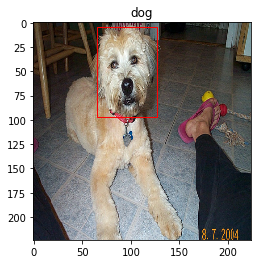

In [49]:
#检查一下
for img,label in train_ds.take(1):
    plt.imshow(tf.keras.preprocessing.image.array_to_img(img[0]))
    pet_label,out1,out2,out3,out4 = label
    plt.title('cat' if pet_label[0]==1 else 'dog')
    xmin = out1[0].numpy()*224
    ymin = out2[0].numpy()*224
    xmax= out3[0].numpy()*224
    ymax = out4[0].numpy()*224
    rect = Rectangle((xmin,ymin),(xmax-xmin),(ymax-ymin),fill=False,color='red')
    ax = plt.gca()
    ax.axes.add_patch(rect)

# 创建图像定位模型

In [50]:
xception = tf.keras.applications.Xception(weights='imagenet',
                                         include_top = False,
                                         input_shape=(224,224,3))

83689472/83683744 [==============================] - 3s 0us/step


In [51]:
xception.summary()

Model: "xception"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 111, 111, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 111, 111, 32) 0           block1_conv1_bn[0][0]            
___________________________________________________________________________________________

In [52]:
inputs = tf.keras.layers.Input(shape=(224,224,3))

In [53]:
x = xception(inputs)
x = tf.keras.layers.GlobalAveragePooling2D()(x)

In [54]:
x.get_shape()

TensorShape([None, 2048])

In [55]:
x = tf.keras.layers.Dense(2048,activation='relu')(x)
x = tf.keras.layers.Dense(256,activation='relu')(x)

In [56]:
#输出宠物类别
out_pet = tf.keras.layers.Dense(1,activation='sigmoid',name='out_pet')(x)

In [57]:
out_pet.get_shape()

TensorShape([None, 1])

In [58]:
#输出四个值，不需要激活了
out1 = tf.keras.layers.Dense(1,name='out1')(x)
out2 = tf.keras.layers.Dense(1,name='out2')(x)
out3 = tf.keras.layers.Dense(1,name='out3')(x)
out4 = tf.keras.layers.Dense(1,name='out4')(x)

prediction = [out_pet,out1,out2,out3,out4]

model = tf.keras.models.Model(inputs=inputs,outputs=prediction)

In [59]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
xception (Model)                (None, 7, 7, 2048)   20861480    input_2[0][0]                    
__________________________________________________________________________________________________
global_average_pooling2d (Globa (None, 2048)         0           xception[1][0]                   
__________________________________________________________________________________________________
dense (Dense)                   (None, 2048)         4196352     global_average_pooling2d[0][0]   
______________________________________________________________________________________________

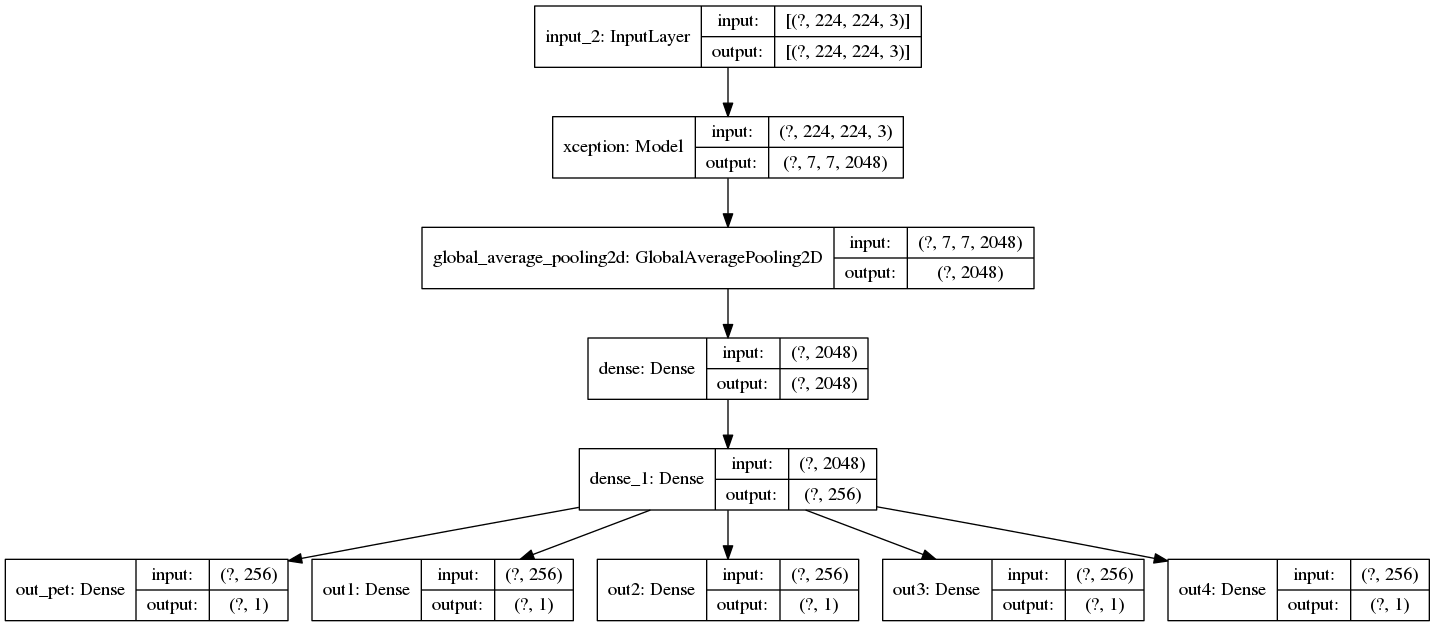

In [60]:
tf.keras.utils.plot_model(model,show_shapes=True)

In [61]:
#编译
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.0001),
             loss = {'out_pet':'binary_crossentropy','out1':'mse'
                     ,'out2':'mse','out3':'mse','out4':'mse'},
             metrics = ['acc', 
                        ['mse'],
                        [ 'mse'],
                        [ 'mse'],
                        [ 'mse']
                     ]#mae平均绝对误差
             )

In [62]:
EPOCH = 15

In [63]:
history = model.fit(dataset,
                    steps_per_epoch=train_count//BATCH_SIZE,
                    epochs=EPOCH,
                    validation_data=test_ds,
                    validation_steps=test_count//BATCH_SIZE
                   )

Train for 92 steps, validate for 23 steps
Epoch 1/15
92/92 [==============================] - 147s 2s/step - loss: 0.3618 - out_pet_loss: 0.2275 - out1_loss: 0.0300 - out2_loss: 0.0168 - out3_loss: 0.0519 - out4_loss: 0.0356 - out_pet_acc: 0.8967 - out1_mse: 0.0300 - out2_mse: 0.0168 - out3_mse: 0.0519 - out4_mse: 0.0356 - val_loss: 0.3833 - val_out_pet_loss: 0.0161 - val_out1_loss: 0.0562 - val_out2_loss: 0.0151 - val_out3_loss: 0.1746 - val_out4_loss: 0.1213 - val_out_pet_acc: 0.9946 - val_out1_mse: 0.0562 - val_out2_mse: 0.0151 - val_out3_mse: 0.1746 - val_out4_mse: 0.1213
Epoch 2/15
92/92 [==============================] - 129s 1s/step - loss: 0.0762 - out_pet_loss: 0.0264 - out1_loss: 0.0128 - out2_loss: 0.0090 - out3_loss: 0.0145 - out4_loss: 0.0135 - out_pet_acc: 0.9931 - out1_mse: 0.0127 - out2_mse: 0.0088 - out3_mse: 0.0145 - out4_mse: 0.0135 - val_loss: 0.1111 - val_out_pet_loss: 0.0017 - val_out1_loss: 0.0321 - val_out2_loss: 0.0109 - val_out3_loss: 0.0355 - val_out4_loss: 0

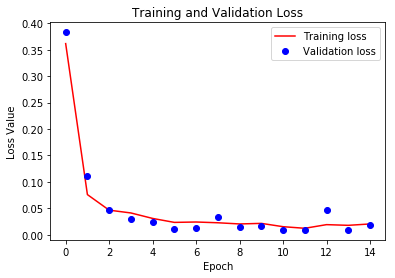

In [64]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(EPOCH)

plt.figure()
plt.plot(epochs,loss,'r',label='Training loss')
plt.plot(epochs,val_loss,'bo',label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss Value')
plt.legend()
plt.show()

In [65]:
model.save('detect_v2.h5')

加载训练好的模型

In [66]:
new_model = tf.keras.models.load_model('../input/ximing-object-detect/detect_v2.h5')

In [67]:
#创建一个画布 放三个图片
plt.figure(figsize=(8,48))
for img in test_dataset.take(1):
    pet,out1,out2,out3,out4 = new_model.predict(img)
    #画三个
    for i in range(6):
        plt.subplot(6,1,i+1)
        plt.imshow(tf.keras.preprocessing.image.array_to_img(img[i]))
        plt.title('cat' if pet[0][0] >= 0.5 else 'dog')
        xmin,ymin,xmax,ymax = out1[i]*224,out2[0]*224,out3[0]*224,out4[0]*224
        rect = Rectangle((xmin,ymin),(xmax-xmin),(ymax-ymin),fill=False,color='red')
        ax = plt.gca()
        ax.axes.add_patch(rect)

ValueError: not enough values to unpack (expected 5, got 4)

<Figure size 576x3456 with 0 Axes>